In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
in_dir = 'titanic_dataset'
train_csv = 'train.csv'
df = pd.read_csv(os.path.join(in_dir, train_csv))

In [3]:
%matplotlib inline

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


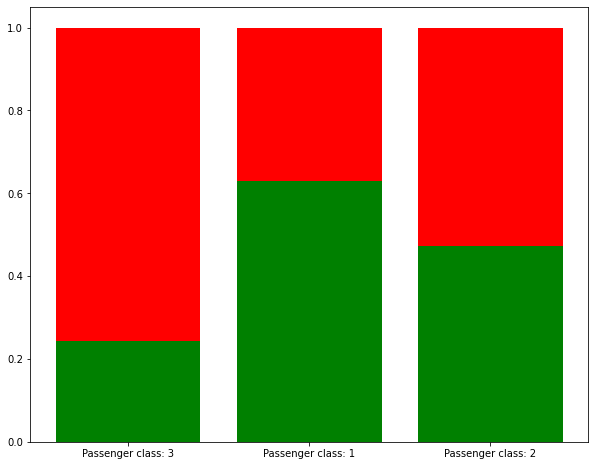

In [5]:
#checking the dependence of Pclass on the survival outcome

fig, ax = plt.subplots(figsize=(10, 8))
for p_class in df['Pclass'].unique():
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['Pclass'] == p_class]
    survived_count = np.sum((filtered_df['Survived']== 1).astype(np.int16))
    dead_count = np.sum((filtered_df['Survived']== 0).astype(np.int16))
    assert survived_count + dead_count == len(filtered_df), "Something went worng"
    ax.bar(x="Passenger class: {}".format(p_class), height=survived_count/len(filtered_df), bottom=0, color='g')
    ax.bar(x="Passenger class: {}".format(p_class), height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')

male
female


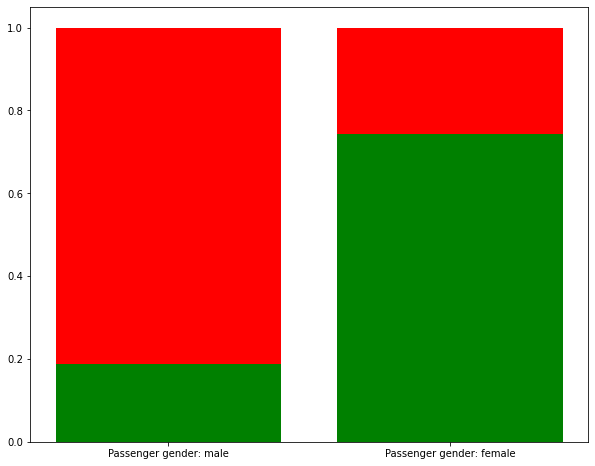

In [6]:
#checking the dependence of passenger gender on the survival outcome

fig, ax = plt.subplots(figsize=(10, 8))
for i, p_gender in enumerate(df['Sex'].unique()):
    print(p_gender)
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['Sex'] == p_gender]
    survived_count = np.sum((filtered_df['Survived']== 1).astype(np.int16))
    dead_count = np.sum((filtered_df['Survived']== 0).astype(np.int16))
    assert survived_count + dead_count == len(filtered_df), "Something went worng"
    ax.bar(x="Passenger gender: {}".format(p_gender), height=survived_count/len(filtered_df), bottom=0, color='g')
    ax.bar(x="Passenger gender: {}".format(p_gender), height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')

S
C
Q
nan


<ipython-input-7-785740f8f9b5>:14: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x="Embarked: {}".format('Unknown'), height=survived_count/len(filtered_df), bottom=0, color='g')
<ipython-input-7-785740f8f9b5>:15: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x="Embarked: {}".format('Unknown'), height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')


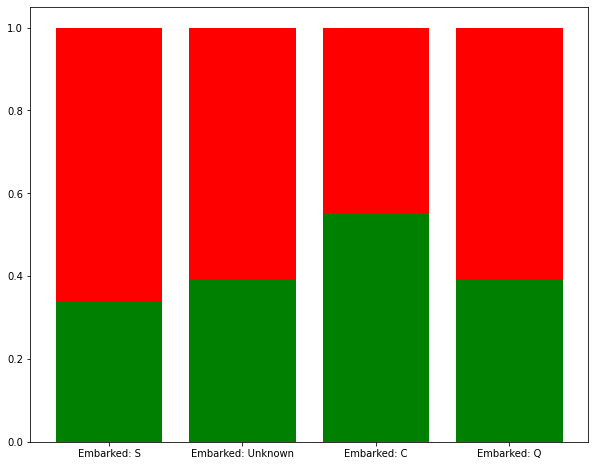

In [7]:
#checking the dependence of passenger gender on the survival outcome

fig, ax = plt.subplots(figsize=(10, 8))
for i, p_embark in enumerate(df['Embarked'].unique()):
    print(p_embark)
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['Embarked'] == p_embark]
    survived_count = np.sum((filtered_df['Survived']== 1).astype(np.int16))
    dead_count = np.sum((filtered_df['Survived']== 0).astype(np.int16))
    assert survived_count + dead_count == len(filtered_df), "Something went worng"
    if (p_embark in ['S', 'C', 'Q']):
        ax.bar(x="Embarked: {}".format(p_embark), height=survived_count/len(filtered_df), bottom=0, color='g')
        ax.bar(x="Embarked: {}".format(p_embark), height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')
    ax.bar(x="Embarked: {}".format('Unknown'), height=survived_count/len(filtered_df), bottom=0, color='g')
    ax.bar(x="Embarked: {}".format('Unknown'), height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')

<ipython-input-8-25c2a98bdd8e>:9: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=survived_count/len(filtered_df), bottom=0, color='g')
<ipython-input-8-25c2a98bdd8e>:10: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')
<ipython-input-8-25c2a98bdd8e>:9: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=survived_count/len(filtered_df), bottom=0, color='g')
<ipython-input-8-25c2a98bdd8e>:10: RuntimeWarning: invalid value encountered in long_scalars
  ax.bar(x=bin_edges[i], height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')


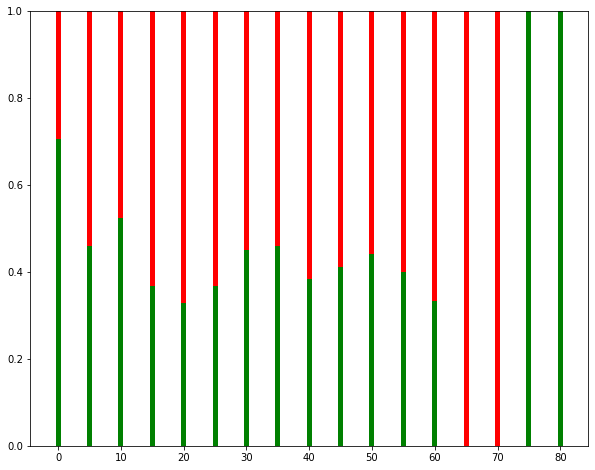

In [8]:
bin_edges = np.arange(0, 100, 5)
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(bin_edges)-1):
    filtered_df = df.copy()
    filtered_df = filtered_df[filtered_df['Age'].between(left=bin_edges[i], right=bin_edges[i+1])]
    survived_count = np.sum((filtered_df['Survived']== 1).astype(np.int16))
    dead_count = np.sum((filtered_df['Survived']== 0).astype(np.int16))
#     print(bin_edges[i], bin_edges[i+1], survived_count, dead_count)
    ax.bar(x=bin_edges[i], height=survived_count/len(filtered_df), bottom=0, color='g')
    ax.bar(x=bin_edges[i], height=dead_count/len(filtered_df), bottom=survived_count/len(filtered_df), color='r')

In [24]:
df = df[df['Embarked'].notnull()]

df['Sex_mod'] = np.where(df['Sex']== 'male', 0, 1)
conditions = [
    (df['Embarked'] == 'S'),
    (df['Embarked'] == 'C'), 
    (df['Embarked'] == 'Q')
    ]
values = [0, 1, 2]
df['Embarked_mod'] = np.select(conditions, values)

#replacing nan ages with 0
# df['Age_mod'] = np.where(df['Age'].isnull(), 0, df['Age'])

# replacing nan ages with a random distribution of ages from the sampling distribution with correct ages
sample_mean = df['Age'].mean()
sample_std = df['Age'].std()
df['Age_mod'] = np.where(df['Age'].isnull(), 
                         np.random.normal(loc=sample_mean, scale=np.sqrt(sample_std)), 
                         df['Age'])


# df = df[df['Age'].notnull()]
filtered_df = df.copy()
filtered_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_mod,Embarked_mod,Age_mod
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,24.499635
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,26.000000


In [54]:
# because we already know the survival classes, I think it would be best to use LDA here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

X = filtered_df[['Pclass', 'Age_mod', 'Sex_mod', 'Parch', 'SibSp', 'Embarked_mod']]
y = filtered_df['Survived']
X, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [55]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(X_train, y_train).transform(X_train)
pd.DataFrame(lda.coef_, columns=X_train.columns)

,Pclass,Age_mod,Sex_mod,Parch,SibSp,Embarked_mod
0,-1.309634,-0.039354,3.408718,-0.073671,-0.266351,0.262994


In [56]:
X_train['LDA_score'] = np.array([float(i[0]) for i in X_lda])
merge_train_df = X_train.join(y_train)
merge_train_df

<ipython-input-56-e507d276f182>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['LDA_score'] = np.array([float(i[0]) for i in X_lda])


,Pclass,Age_mod,Sex_mod,Parch,SibSp,Embarked_mod,LDA_score,Survived
209,1,40.000000,0,0,0,1,-0.249738,1
312,2,26.000000,1,1,1,0,-1.506205,0
210,3,24.000000,0,0,0,0,1.132918,0
722,2,34.000000,0,0,0,0,0.570614,0
299,1,50.000000,1,1,0,1,-2.055246,1
...,...,...,...,...,...,...,...,...
107,3,24.499635,0,0,0,0,1.144987,1
271,3,25.000000,0,0,0,0,1.157073,1
862,1,48.000000,1,0,0,0,-1.987350,1
436,3,21.000000,1,2,2,0,-0.614417,0


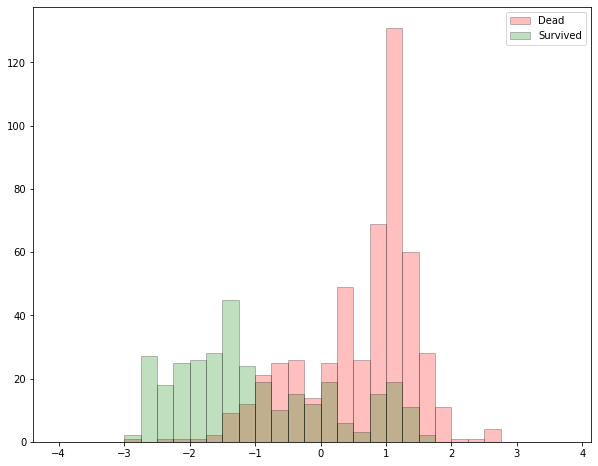

In [57]:
# plotting the distribution of the LDA weights
fig, ax = plt.subplots(figsize=(10, 8))
for label, color, marker, status in zip([0, 1], ['red', 'green'], ['^', 's'], ['Dead', 'Survived']):
    ax.hist(x=merge_train_df['LDA_score'][merge_train_df['Survived'] == label], 
            color=color, alpha=0.25, label=status, ec='k', bins=np.arange(-4, 4, 0.25))
ax.legend()

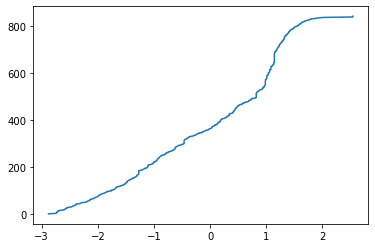

In [58]:
plt.plot(np.sort(X_train['LDA_score']), range(len(X_train['LDA_score'])))

0.7692307692307692

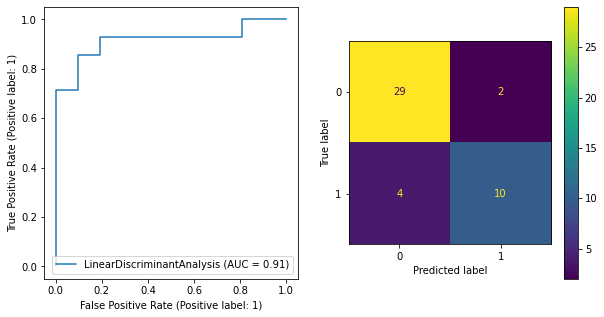

In [59]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
lda_disp = plot_roc_curve(lda, X_test, y_test, ax=ax[0])

y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax[1])

f1_score(y_test, y_pred)

In [60]:
#reading the test dataset
test_csv = 'test.csv'
test_df = pd.read_csv(os.path.join(in_dir, test_csv))

test_df = test_df[test_df['Embarked'].notnull()]

test_df['Sex_mod'] = np.where(test_df['Sex']== 'male', -1, 1)
conditions = [
    (test_df['Embarked'] == 'S'),
    (test_df['Embarked'] == 'C'), 
    (test_df['Embarked'] == 'Q')
    ]
values = [-1, 0, 1]
test_df['Embarked_mod'] = np.select(conditions, values)

# replacing nan ages with a random distribution of ages from the sampling distribution with correct ages
sample_mean = test_df['Age'].mean()
sample_std = test_df['Age'].std()
test_df['Age_mod'] = np.where(test_df['Age'].isnull(), 
                              np.random.normal(loc=sample_mean, scale=np.sqrt(sample_std)), 
                              test_df['Age'])
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_mod,Embarked_mod,Age_mod
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-1,1,34.50000
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,-1,47.00000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-1,1,62.00000
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-1,-1,27.00000
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,-1,22.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,-1,-1,27.26514
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,39.00000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,-1,-1,38.50000
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,-1,-1,27.26514


In [61]:
filtered_test_df = test_df[['Pclass', 'Age_mod', 'Sex_mod', 'Parch', 'SibSp', 'Embarked_mod']]

In [62]:
filtered_test_df['Prediction'] = lda.predict(filtered_test_df)
filtered_test_df

<ipython-input-62-5190ca37a860>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_df['Prediction'] = lda.predict(filtered_test_df)


,Pclass,Age_mod,Sex_mod,Parch,SibSp,Embarked_mod,Prediction
0,3,34.50000,-1,0,0,1,0
1,3,47.00000,1,0,1,-1,0
2,2,62.00000,-1,0,0,1,0
3,3,27.00000,-1,0,0,-1,0
4,3,22.00000,1,1,1,-1,1
...,...,...,...,...,...,...,...
413,3,27.26514,-1,0,0,-1,0
414,1,39.00000,1,0,0,0,1
415,3,38.50000,-1,0,0,-1,0
416,3,27.26514,-1,0,0,-1,0


In [63]:
submission_df = test_df.join(filtered_test_df['Prediction'])[['PassengerId', 'Prediction']]

In [64]:
submission_df = submission_df.rename(columns={"Prediction": "Survived"})
submission_df.to_csv('LDA_submission_.csv', index=False)

# Doing a double gaussian fit on the LDA scores

In [13]:
sorted_X_lda = np.sort(np.array([i[0] for i in X_lda]))

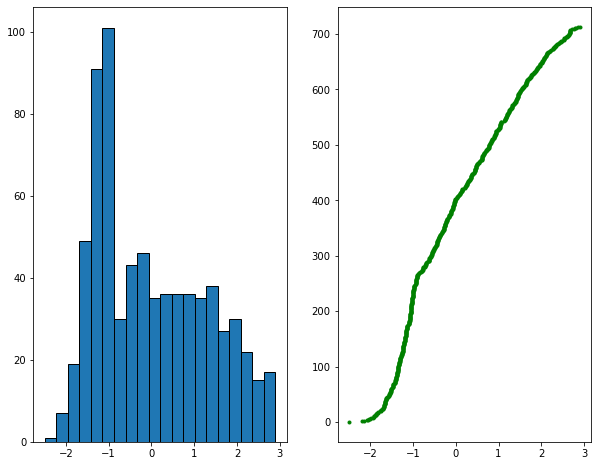

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
ax[0].hist(X_lda, ec='k', bins=20)
ax[1].plot(sorted_X_lda, range(len(X_lda)), 'g.')

In [17]:
y = np.arange(len(X_lda))
x = sorted_X_lda

#now performing a double gaussian fit on the LDA weights
from scipy.special import erf
from lmfit import Model

# define the basic model.  I included an amplitude parameter
def gaussian_cdf(x, amp, mu, sigma):
    return (amp/2.0)*(1 + erf( (x-mu)/(sigma*np.sqrt(2))))

# create a model that is the sum of two gaussian_cdfs
# note that a prefix names each component and will be
# applied to the parameter names for each model component
model = Model(gaussian_cdf, prefix='g1_') + Model(gaussian_cdf, prefix='g2_')

# make a parameters object -- a dict with parameter names
# here you add the guess values to your model. Try to get a nice guess of mu
# the other don't worry too much
params = model.make_params(g1_amp=1, g1_mu=-1.5, g1_sigma=0.5,
                           g2_amp=1, g2_mu=0.5, g2_sigma=1)

# you can apply bounds to any parameter
params['g1_sigma'].min = 0   # sigma must be > 0!
params['g2_sigma'].min = 0   # sigma must be > 0!

params['g1_amp'].min = 0
params['g2_amp'].min = 0

# run the fit
result = model.fit(y, params, x=x)

print(result.fit_report())

# plot results, including individual components
comps = result.eval_components(result.params, x=x)

[[Model]]
    (Model(gaussian_cdf, prefix='g1_') + Model(gaussian_cdf, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 171
    # data points      = 714
    # variables        = 6
    chi-square         = 504.828466
    reduced chi-square = 0.71303456
    Akaike info crit   = -235.518284
    Bayesian info crit = -208.092986
##  Warning: uncertainties could not be estimated:
[[Variables]]
    g1_amp:    3.1865e-04 (init = 1)
    g1_mu:     29092.0394 (init = -1.5)
    g1_sigma:  3915.64482 (init = 0.5)
    g2_amp:    2.81482385 (init = 1)
    g2_mu:     577.794166 (init = 0.5)
    g2_sigma:  103.890398 (init = 1)


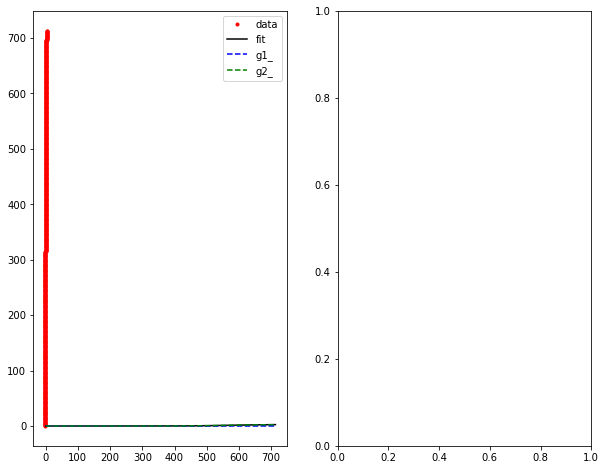

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

ax[0].plot(y, x,'r.', label='data')
ax[0].plot(x, result.best_fit, 'k-', label='fit')
ax[0].plot(x, comps['g1_'], 'b--', label='g1_')
ax[0].plot(x, comps['g2_'], 'g--', label='g2_')
ax[0].legend(loc='best')

In [ ]:
def gaussian_pdf(x, amp, mu, sigma):
    return (amp/(sigma*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2/(2*sigma**2)))

bins=np.arange(10, 50, 1)
ax[1].hist(data[sheet], bins=bins, density=True, alpha=0.8, color='gray', rwidth=0.85,  \
           label='N = {0}'.format(len(data[sheet])))

x = np.linspace(0, 50, 200)


##plotting the second gaussian
amp2 = result.params['g2_amp']
mu2 = result.params['g2_mu']
sigma2 = result.params['g2_sigma']
ax[1].plot(x, gaussian_pdf(x, amp2, mu2, sigma2), 'g--', \
           label='$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(mu2.value, sigma2.value))

##plotting the first gaussian
amp1 = result.params['g1_amp']
mu1 = result.params['g1_mu']
sigma1 = result.params['g1_sigma']
ax[1].plot(x, gaussian_pdf(x, amp1, mu1, sigma1), 'b--', \
           label='$\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(mu1.value, sigma1.value))

ax[1].legend(loc='best')
ax[1].set_ylim(bottom=0, top=0.4)
fig.tight_layout()